In [1]:
import pandas as pd
import numpy as np
import os
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib notebook
import re
import plotly.express as px
from scipy.stats import linregress


pd.options.display.float_format = '{:.2f}'.format

In [3]:
merged_df = pd.read_csv('Clean Data\Housing data by values\Housing_data_clean_merged.csv')
merged_df.head()

,State,CountyName,Housing Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NY,New York County,Data_1_bed,524230.33,572724.58,577255.17,601978.33,652846.00,692174.33,707325.42,736360.25,731432.75,702898.83,685897.33
1,IL,Cook County,Data_1_bed,211172.75,192259.83,178664.08,188592.92,204526.83,205508.17,209737.25,216489.17,220843.92,217292.50,219304.00
2,NY,New York County,Data_1_bed,623403.75,653817.67,661195.17,712712.50,808760.17,845258.83,855036.17,845226.42,823293.50,788139.58,765217.33
3,IL,Cook County,Data_1_bed,234486.42,219276.25,207400.75,219404.67,231354.75,236109.92,241497.33,248256.42,251728.92,249244.58,247461.33
4,TX,Harris County,Data_1_bed,95503.25,87770.00,80351.83,86292.58,97141.00,109236.25,117556.75,120752.42,128352.42,134669.08,140585.33


In [4]:
# create lists for years
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
state_df_10 = pd.DataFrame(merged_df.groupby("State")[years].mean())
state_df_10.head(7)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
AK,231445.06,228717.82,231169.96,236093.23,241064.58,247966.00,252271.47,253235.34,255738.71,266552.22,274801.00
AL,155498.91,149301.99,147113.69,148191.85,150574.62,153680.91,156818.24,161698.78,168549.34,175482.06,183986.25
AR,123173.78,121320.69,122172.10,124257.33,125861.48,128572.22,131986.37,136485.41,141353.16,146848.06,152091.51
AZ,184334.03,166374.93,174706.83,198547.77,212104.17,220482.14,231891.25,244551.37,261395.80,275844.31,299263.13
CA,405468.51,384065.70,387856.35,451519.65,502475.13,539876.50,580710.54,622375.12,678231.93,688833.82,721214.60
CO,264003.73,253901.17,257041.12,273263.99,293601.68,319819.30,346463.94,371276.15,398067.77,415672.73,430641.06
CT,317108.41,302346.70,287283.36,293665.57,297951.43,297853.44,298206.95,302844.51,306610.46,307229.56,316352.65


In [5]:
state_trans = pd.DataFrame(state_df_10.transpose())
state_trans = state_trans.reset_index()
state_trans["index"] = pd.to_numeric(state_trans['index'])
state_trans["Average"] = state_trans.mean(axis=1)


In [6]:
#state_trans["Average"] = state_trans.mean(axis=1)
state_trans

State,index,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Average
0,2010,231445.06,155498.91,123173.78,184334.03,405468.51,264003.73,317108.41,540096.80,266283.97,...,143073.88,157216.21,209968.69,233316.81,219238.08,247484.36,154229.63,104735.32,235568.47,206733.44
1,2011,228717.82,149301.99,121320.69,166374.93,384065.70,253901.17,302346.70,537638.11,249862.26,...,139013.99,153248.58,197662.46,228111.40,218737.06,228029.27,147305.64,103210.57,232802.19,199311.70
2,2012,231169.96,147113.69,122172.10,174706.83,387856.35,257041.12,287283.36,551055.62,238235.66,...,138195.20,155010.09,199330.14,228239.67,218252.90,222382.30,144034.73,102878.54,235572.97,197992.48
3,2013,236093.23,148191.85,124257.33,198547.77,451519.65,273263.99,293665.57,600479.47,239535.57,...,141842.13,163396.55,216986.99,234553.84,217999.75,240151.00,145805.15,104115.25,242182.03,207463.82
4,2014,241064.58,150574.62,125861.48,212104.17,502475.13,293601.68,297951.43,641462.77,247260.76,...,147251.16,175341.32,228197.35,240481.34,216860.93,255842.79,150493.55,106165.21,250231.64,217458.90
5,2015,247966.00,153680.91,128572.22,220482.14,539876.50,319819.30,297853.44,662589.33,252221.10,...,153141.97,187523.70,238093.33,243081.55,218195.96,275719.10,154794.03,108537.92,259059.96,225693.28
6,2016,252271.47,156818.24,131986.37,231891.25,580710.54,346463.94,298206.95,687560.97,257963.36,...,161706.19,198592.21,253797.33,246165.29,219627.19,303672.44,160917.43,110846.94,265457.82,234828.48
7,2017,253235.34,161698.78,136485.41,244551.37,622375.12,371276.15,302844.51,716768.93,263491.80,...,172469.45,209615.55,274771.96,253197.70,224091.65,337242.08,169802.90,112540.74,269200.50,245858.13
8,2018,255738.71,168549.34,141353.16,261395.80,678231.93,398067.77,306610.46,740003.40,271975.39,...,183769.47,220161.62,300308.57,260638.40,232314.60,371529.89,179931.11,116441.22,279023.36,258753.70
9,2019,266552.22,175482.06,146848.06,275844.31,688833.82,415672.73,307229.56,770586.72,278925.08,...,193297.41,229398.41,321843.73,270229.36,239696.93,385467.83,188724.01,120078.20,290300.49,268133.22


In [12]:
#New Jersey regression analysis
x_values = state_trans["index"]
y_values = state_trans["NJ"]/1000
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,alpha= 0.5,color="red",edgecolor="navy")
plt.plot(x_values,regress_values,"--",label='National Avg')
plt.annotate(line_eq,(2013,380),fontsize=9,color="blue")
plt.ylabel("Avg Property $(in thousands)",fontsize=9)
plt.xlabel("NJ")
plt.grid()
plt.legend()
plt.show()
plt.savefig("Outputs/NJ_Regression.png")

In [8]:
# create lists for top 10 states & bottom 10 states
top_ten = ["TX","KY","MO","OK","IA","TN","VA","SD","MN","KS"]
bot_ten = ["RI","UT","ME","WY","ID","AZ","MI","HI","DE","NV"]

<IPython.core.display.Javascript object>


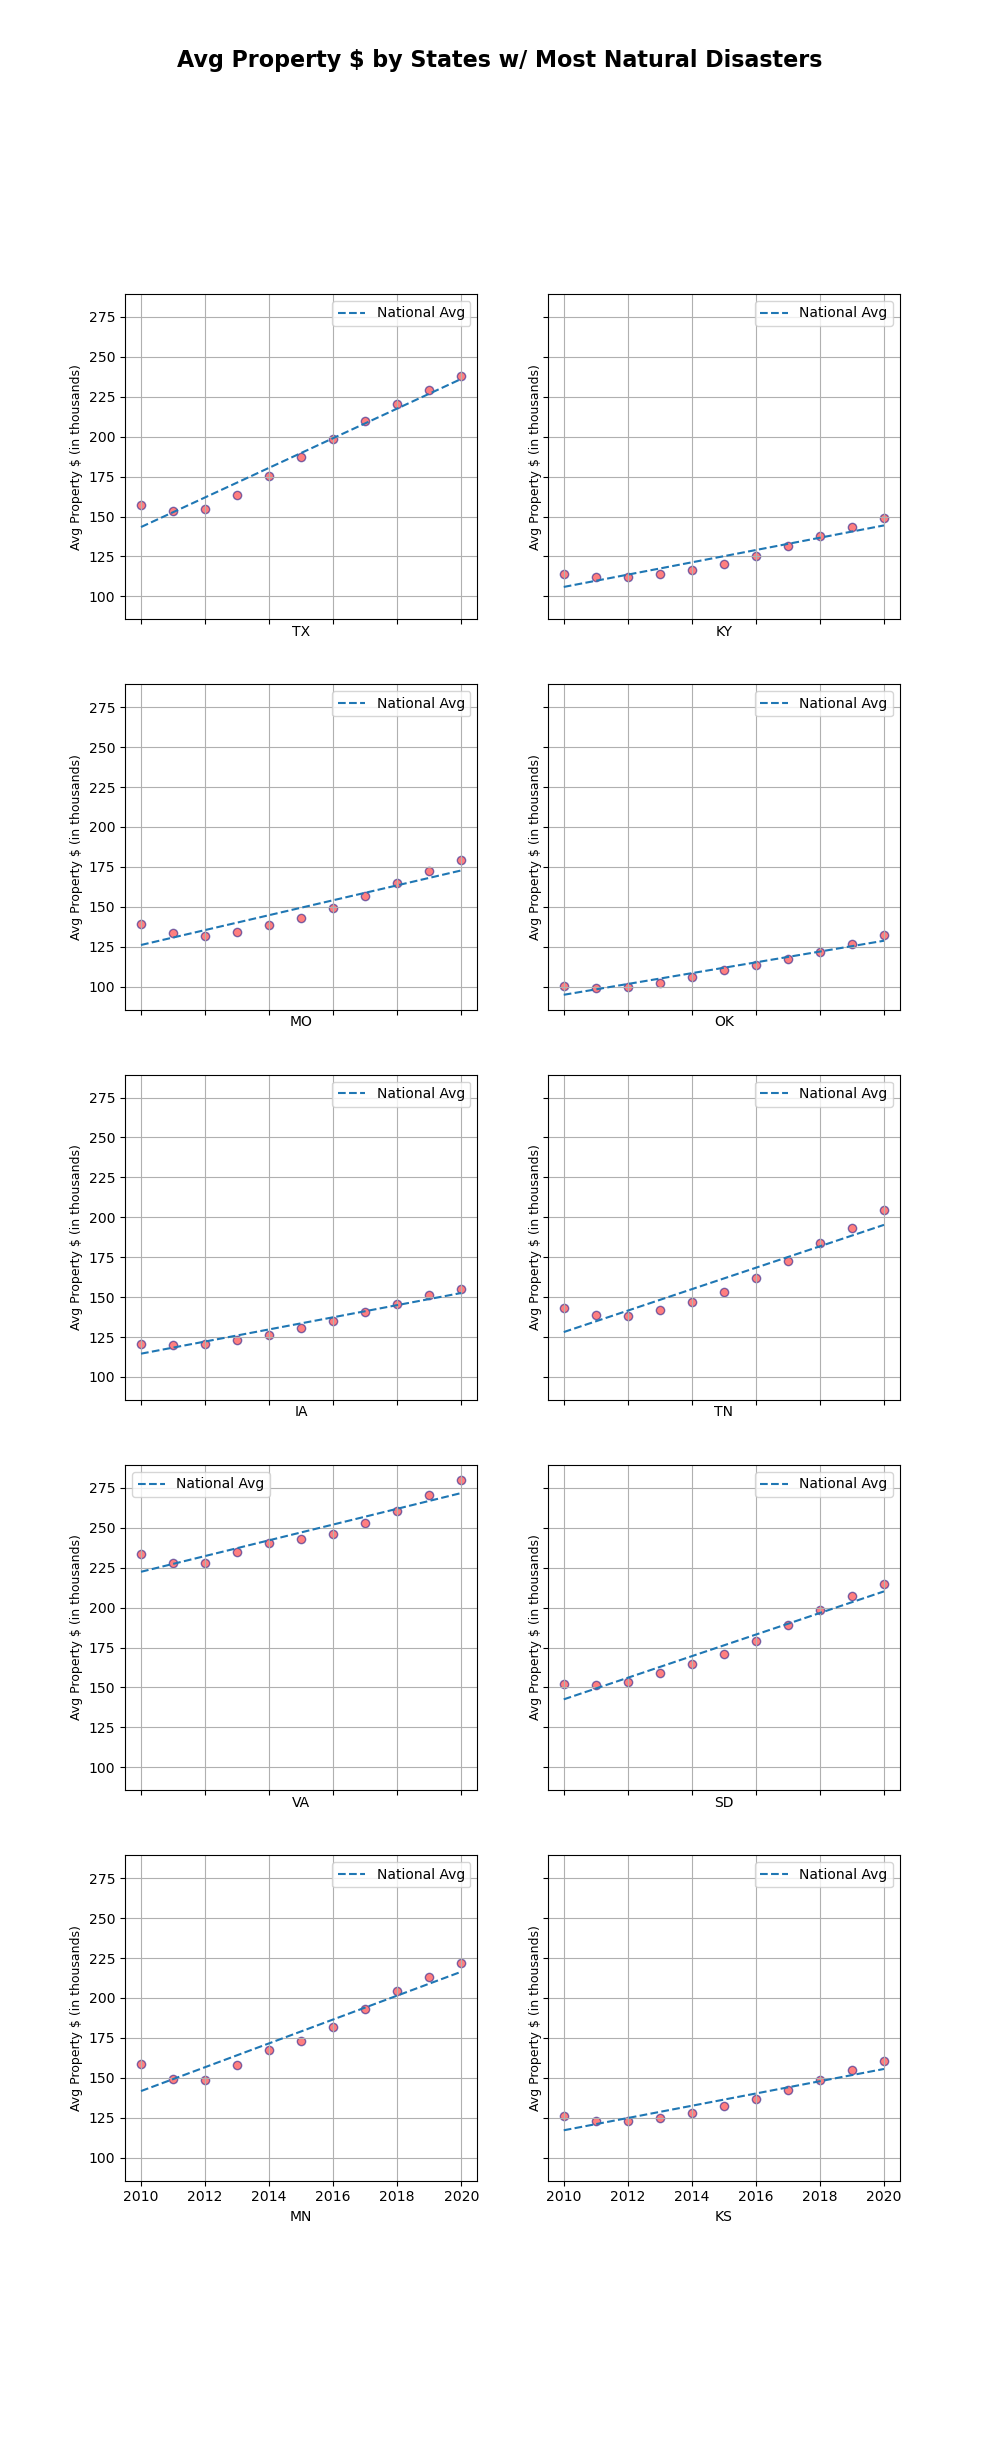

In [13]:
# Top Ten States (natural disaster) regression analysis

fig, ax = plt.subplots(5,2, figsize=(10,24.5), sharex=True, sharey=True)
fig.suptitle("Avg Property $ by States w/ Most Natural Disasters", fontsize=16, fontweight="bold")

ax = ax.ravel()
for ind in range(len(top_ten)):
    state = top_ten[ind]
    x_values = state_trans["index"]
    y_values = state_trans[state]/1000
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax[ind].scatter(x_values,y_values,alpha=0.5,color="red",edgecolor="navy")
    ax[ind].plot(x_values,regress_values,"--",label='National Avg')
    ax[ind].annotate(line_eq,(2010,210000),fontsize=9,color="blue")
    ax[ind].set_ylabel("Avg Property $ (in thousands)",fontsize=9)
    ax[ind].set_xlabel(state)
    ax[ind].grid()
    ax[ind].legend()
plt.show()
plt.savefig("Outputs/AvgPropertybyStateTOP10")
    # 

<IPython.core.display.Javascript object>


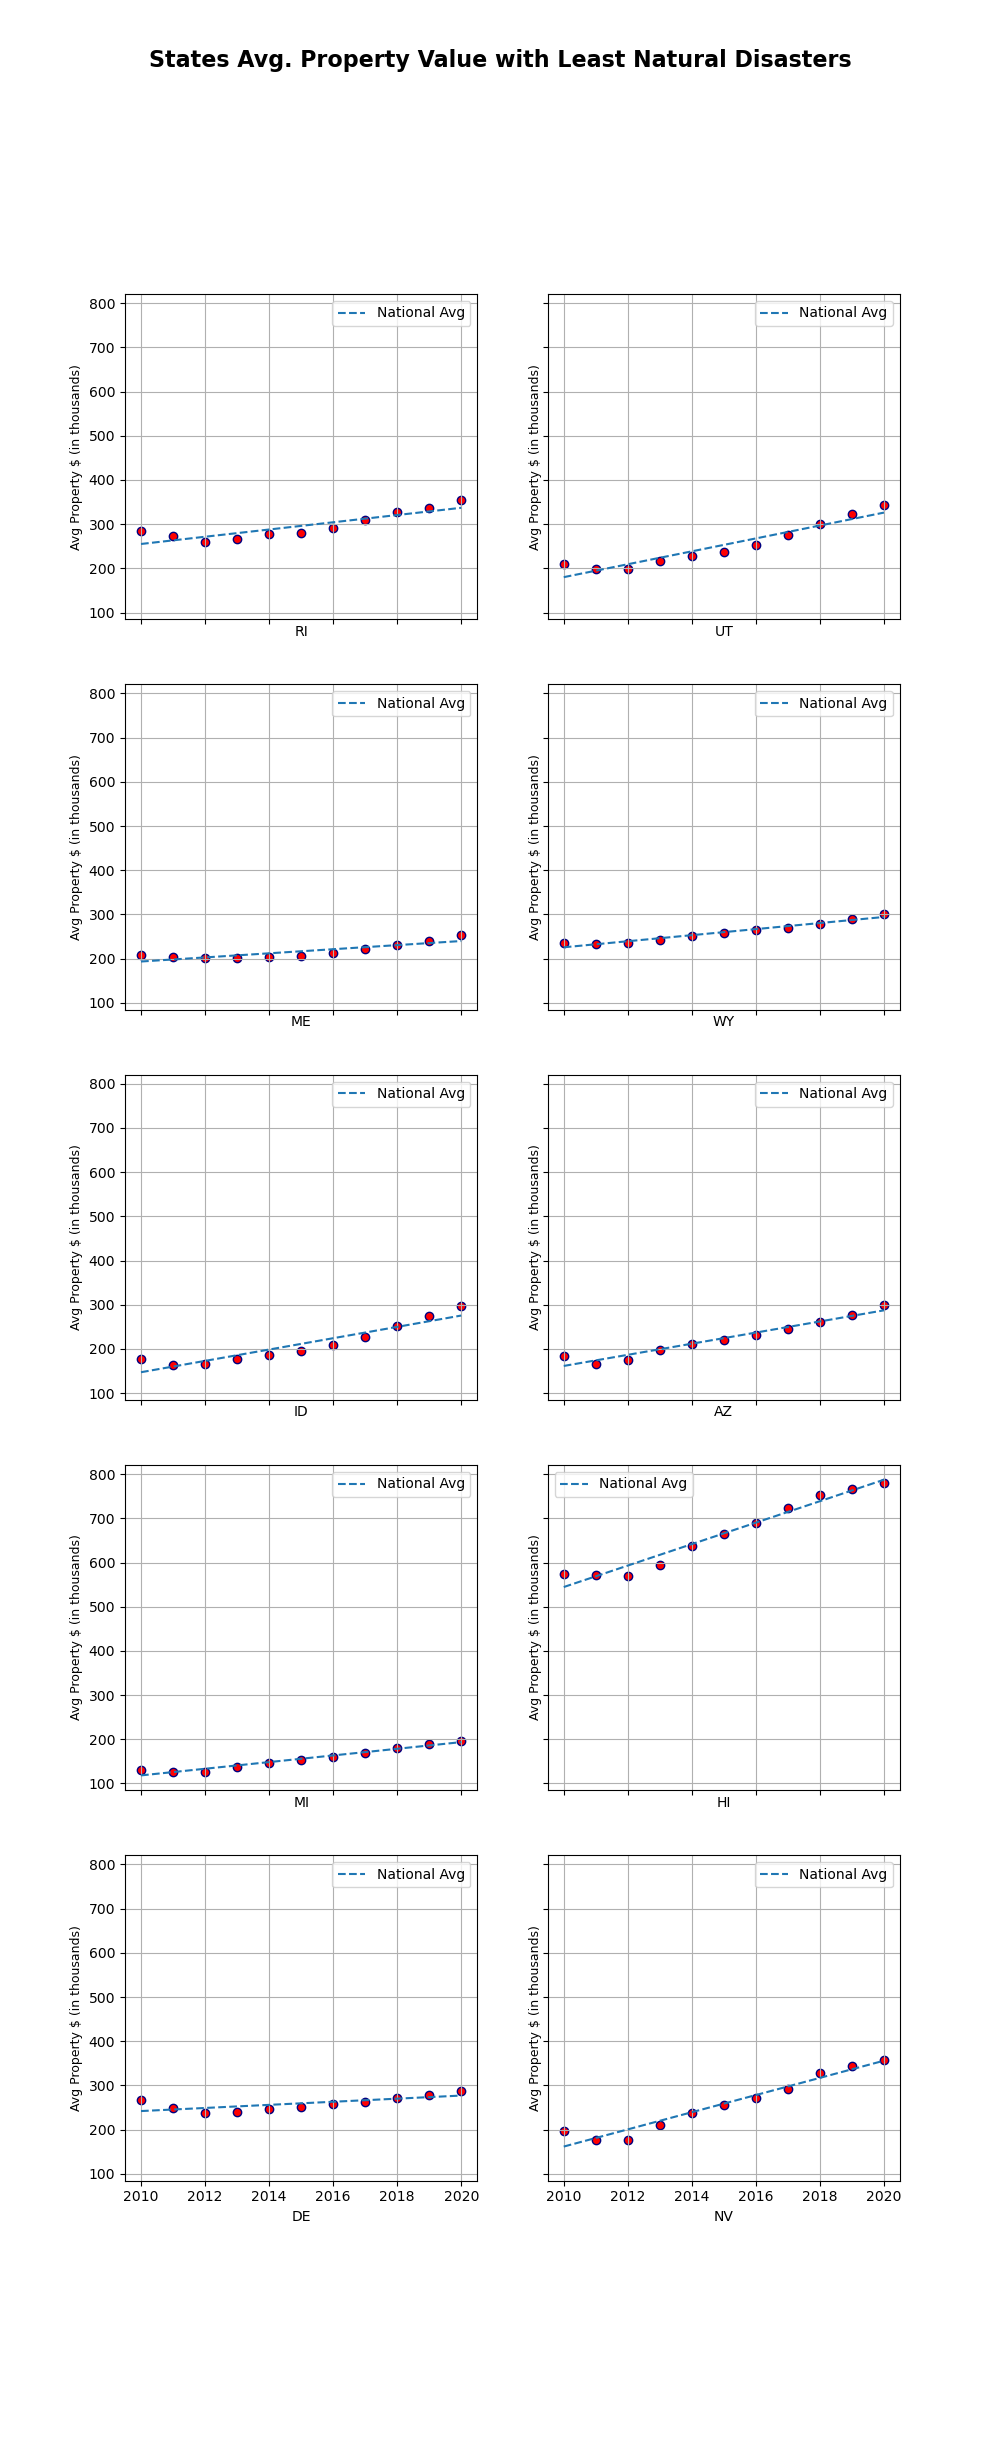

In [14]:
# Bottom Ten States (natural disasters) regression anaylsis

fig, ax = plt.subplots(5,2, figsize=(10,24.5), sharex=True, sharey=True)
fig.suptitle("States Avg. Property Value with Least Natural Disasters", fontsize=16, fontweight="bold")

ax = ax.ravel()
for ind in range(len(top_ten)):
    state = bot_ten[ind]
    x_values = state_trans["index"]
    y_values = state_trans[state]/1000
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax[ind].scatter(x_values,y_values,color="red",edgecolor="navy")
    ax[ind].plot(x_values,regress_values,"--",label='National Avg')
    ax[ind].annotate(line_eq,(2010,400000),fontsize=9,color="blue")
    ax[ind].set_ylabel("Avg Property $ (in thousands)",fontsize=9)
    ax[ind].set_xlabel(state)
    ax[ind].grid()
    ax[ind].legend()
plt.show()
plt.savefig("Outputs/AvgPropertybyStateBOTTOM10")
    